# p.18【例2】事後分布の例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

混合正規分布からのサンプル生成  
$X \sim(1-a)\mathcal{N}(0,1)+a\mathcal{N}(b,1)$

In [2]:
def generate(a, b):
    u = np.random.random()
    if u < 1 - a:
        return np.random.normal(0, 1)
    else:
        return np.random.normal(b, 1)

確率モデルの定義  
$\displaystyle p(x\mid a,b)=\frac{1-a}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)+\frac{a}{\sqrt{2\pi}}\exp\left(-\frac{(x-b)^2}{2}\right)$

In [5]:
def p(x, a, b):
    return (1 - a) * norm(0, 1).pdf(x) + a * norm(b, 1).pdf(x)

尤度関数の形状を描画する  
(事前分布が場所によらず一定値を取る場合を考えるので、事後分布は尤度関数と同じ形)  
$a_0,\ b_0$を真のパラメータとする

3次元プロット

In [6]:
def plot3D(a0, b0, n=100):
    data = [generate(a0, b0) for i in range(n)]
    a = np.linspace(0, 1, 100)
    b = np.linspace(-5, 5, 1000)
    a, b = np.meshgrid(a, b)
    likelihood = np.prod([p(x, a, b) for x in data], axis=0)
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes(projection='3d')
    ax.plot_surface(a, b, likelihood)
    ax.set_xlim3d(0, 1)
    ax.set_ylim3d(-5, 5)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('likelihood')
    ax.set_title(f'a0={a0}, b0={b0}, n={n}')

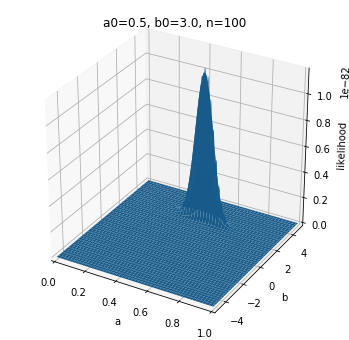

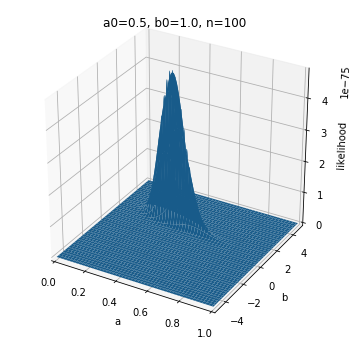

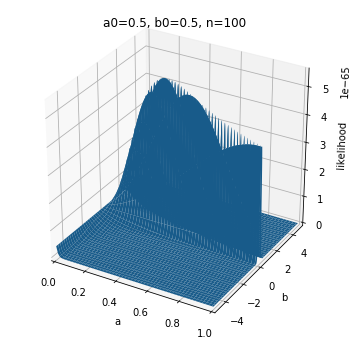

In [7]:
plot3D(0.5,3.0)
plot3D(0.5,1.0)
plot3D(0.5,0.5)

2次元に等高線プロット

In [8]:
def contour(a0, b0, n=100):
    data = [generate(a0, b0) for i in range(n)]
    a = np.linspace(0, 1, 100)
    b = np.linspace(-5, 5, 1000)
    a, b = np.meshgrid(a, b)
    likelihood = np.prod([p(x, a, b) for x in data], axis=0)
    plt.figure(figsize=(6, 6))
    plt.contour(a, b, likelihood)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title(f'a0={a0}, b0={b0}, n={n}')

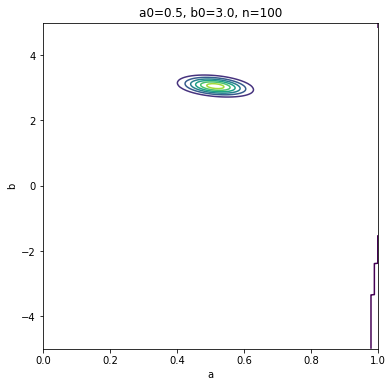

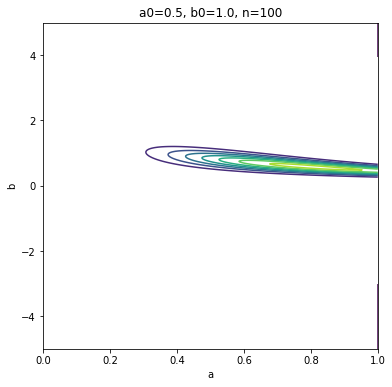

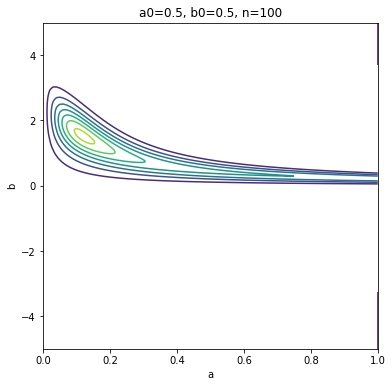

In [13]:
contour(0.5,3.0)
contour(0.5,1.0)
contour(0.5,0.5)